# Data Mining (KEN4113) #
## Lab 1: Regression ##

Konstantin Sandfort
i6255681

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

## 1. Linear Regression Model Analysis

### 1.1 Gender Bias Analysis

In [2]:
b_0 = 50
b_1 = 20
b_2 = 0.07
b_3 = 10
b_4 = 0.01
b_5 = -3

b = [b_0, b_1, b_2, b_3, b_4, b_5]

# Example of male and female person after graduation

def calc_salary(person, coeff):
    salary = coeff[0] + (person[0] * coeff[1]) + (person[1] * coeff[2]) + (person[2] * coeff[3])
    # Add interaction terms
    salary += person[0] * person[1] * coeff[4]
    salary += person[0] * person[2] * coeff[5]
    return salary

# Generate 1000 male and female individuals with random GPA and IQ
# We don't know anything about the distribution, so we assume a normal distribution
n = 10000
# First, random numbers from a uniform distribution are generated
male_gpa = np.random.normal(2, 1, n)
male_iq = np.random.normal(100, 15, n)

female_gpa = np.random.normal(2, 1, n)
female_iq = np.random.normal(100, 15, n)

# Adjust values out of range
def squish_to_bounds(x, lower, upper):
    if x < lower:
        return lower
    elif x > upper:
        return upper
    else:
        return x

squish_vec = np.vectorize(squish_to_bounds)

male_gpa_adjusted = squish_vec(male_gpa, 0, 4)
male_iq_adjusted = squish_vec(male_iq, 70, 130)

female_gpa_adjusted = squish_vec(female_gpa, 0, 4)
female_iq_adjusted = squish_vec(female_iq, 70, 130)

males = np.transpose(np.vstack([male_gpa_adjusted, male_iq_adjusted, np.zeros(n)]))
females = np.transpose(np.vstack([female_gpa_adjusted, female_iq_adjusted, np.ones(n)]))
print(males)

# The following two vectors contain n salaries of each individual.
salary_male = np.apply_along_axis(calc_salary, 1, males, b)
salary_female = np.apply_along_axis(calc_salary, 1, females, b)

#print(salary_male)
#print(salary_female)

[[  1.4585083  122.48434332   0.        ]
 [  2.02788822  95.45657999   0.        ]
 [  2.1954015  108.55634915   0.        ]
 ...
 [  2.81283178 100.01987429   0.        ]
 [  1.51207185  81.59285186   0.        ]
 [  2.65620763  93.95297652   0.        ]]


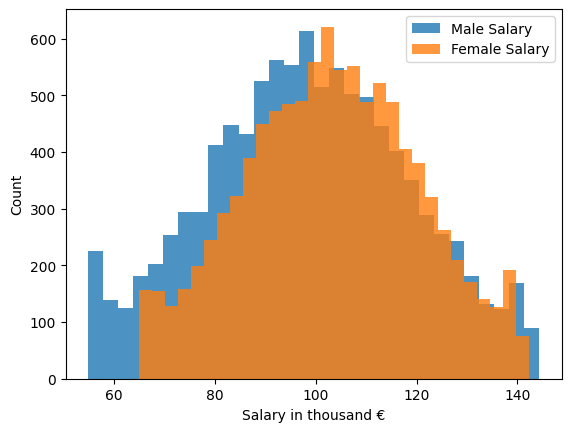

In [3]:
# Plot histograms and show salary distribution properties
plt.hist(salary_male, bins=30, alpha=0.8, label='Male Salary')
plt.hist(salary_female, bins=30, alpha= 0.8, label='Female Salary')
plt.xlabel('Salary in thousand €')
plt.ylabel('Count')
plt.legend()

### 1.2 Model Tree

## 2. Data Generation and Model Fitting

### 2.1 First Data Generation

In [4]:
# Set random seed
np.random.seed(42)
x = np.random.normal(0, 1, 100)
eps = np.random.normal(0, np.sqrt(0.25), 100)
y = -0.5 + (0.75 * x) + eps
print(f'Vector y length: {len(y)}')

Vector y length: 100


### 2.2 First Data Visualisation

Text(0, 0.5, 'y values')

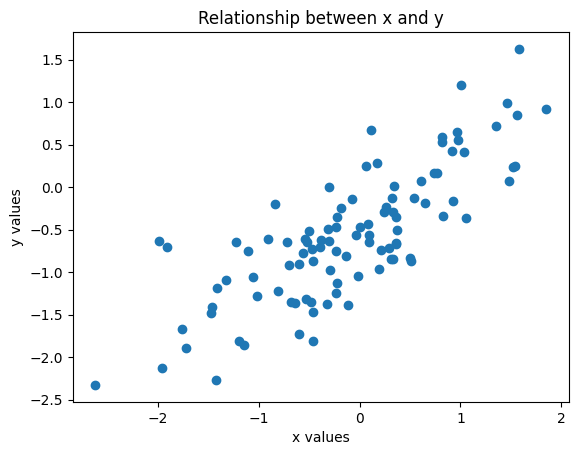

In [5]:
plt.scatter(x, y)
plt.title('Relationship between x and y')
plt.xlabel('x values')
plt.ylabel('y values')

### 2.3 Fitting First Linear Regression

In [6]:
# (a)
model = linear_model.LinearRegression()
model.fit(x[:, None], y)
print('Linear Regression model coefficients')
print(f'b_0: {model.intercept_}, b_1: {model.coef_[0]}')

Linear Regression model coefficients
b_0: -0.4962860850680164, b_1: 0.6783714198642783


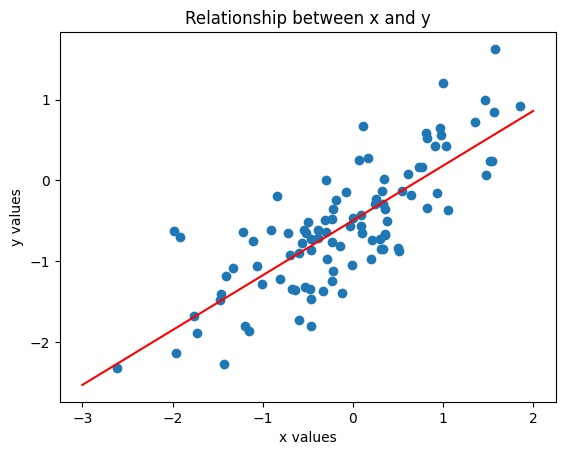

In [7]:
# (b) Plot the same scatter plot with regression line:
plt.scatter(x, y)
plt.title('Relationship between x and y')
plt.xlabel('x values')
plt.ylabel('y values')
x_line = np.linspace(-3, 2, 100)
y_line = (model.intercept_ + model.coef_[0] * x_line)
plt.plot(x_line, y_line, color='red')


In [8]:
# (c)
y_pred = model.intercept_ + (x * model.coef_[0])
r2 = metrics.r2_score(y, y_pred)
print(f'r2 score: {r2}')

r2 score: 0.6297598193059208


### 2.4 Fitting Second Linear Regression

In [9]:
# (a), (b)
poly_model = PolynomialFeatures(degree=2, include_bias=False)
features = poly_model.fit_transform(x[:, None])
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(features, y)
print('Polynomial Regression model coefficients')
print(f'b_0: {poly_linear_model.intercept_}, b_1: {poly_linear_model.coef_[0]}, b_2: {poly_linear_model.coef_[1]}')

Polynomial Regression model coefficients
b_0: -0.5690705740231349, b_1: 0.7121283510062472, b_2: 0.09221497437831454


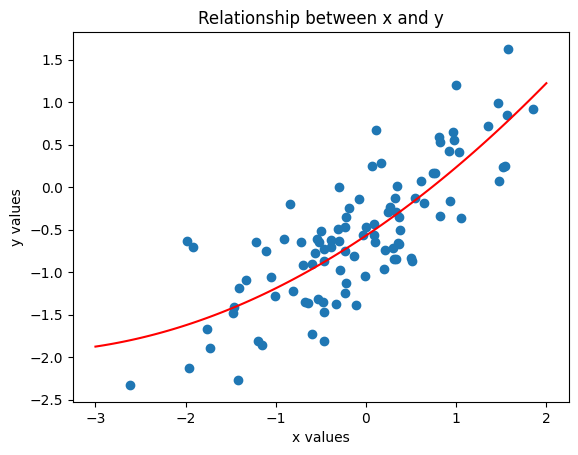

In [10]:
# (c)
plt.scatter(x, y)
plt.title('Relationship between x and y')
plt.xlabel('x values')
plt.ylabel('y values')
x_line = np.linspace(-3, 2, 100)
y_line = (poly_linear_model.intercept_ + (poly_linear_model.coef_[0] * x_line) + (poly_linear_model.coef_[1] * x_line**2))
plt.plot(x_line, y_line, color='red')

### 2.5 Second Data Generation

In [11]:
# Alter y values to quadratic function
y = -0.5 + (0.75 * x) + x**2 + eps

### 2.6 Second Data Visualisation

Text(0, 0.5, 'y values')

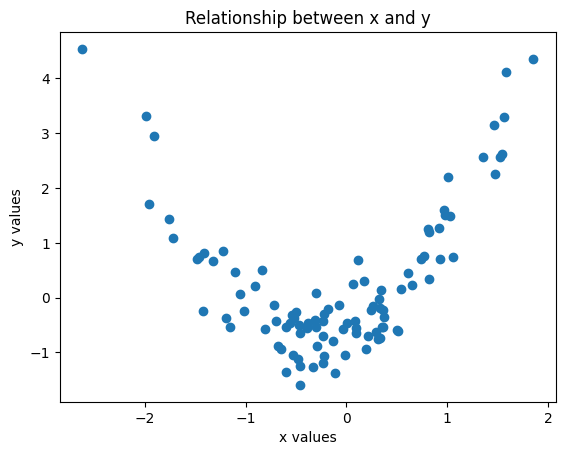

In [12]:
plt.scatter(x, y)
plt.title('Relationship between x and y')
plt.xlabel('x values')
plt.ylabel('y values')

### 2.7 Fitting Third Linear Regression

In [13]:
# (a)
model = linear_model.LinearRegression()
model.fit(x[:, None], y)
print('Linear Regression model coefficients')
print(f'b_0: {model.intercept_}, b_1: {model.coef_[0]}')

Linear Regression model coefficients
b_0: 0.2930053445052121, b_1: 0.31230363781968196


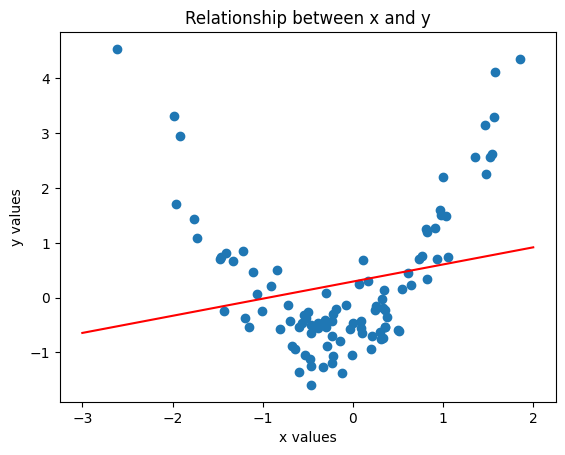

In [14]:
# (b) Plot the same scatter plot with regression line:
plt.scatter(x, y)
plt.title('Relationship between x and y')
plt.xlabel('x values')
plt.ylabel('y values')
x_line = np.linspace(-3, 2, 100)
y_line = (model.intercept_ + model.coef_[0] * x_line)
plt.plot(x_line, y_line, color='red')

In [15]:
# (c)
y_pred = model.intercept_ + (x * model.coef_[0])
r2 = metrics.r2_score(y, y_pred)
print(f'r2 score: {r2}')

r2 score: 0.045956423052825435


### 2.8 Fitting Fourth Linear Regression

In [16]:
# (a)
poly_model = PolynomialFeatures(degree=2, include_bias=False)
features = poly_model.fit_transform(x[:, None])
poly_linear_model = linear_model.LinearRegression()
poly_linear_model.fit(features, y)
print('Polynomial Regression model coefficients')
print(f'b_0: {poly_linear_model.intercept_}, b_1: {poly_linear_model.coef_[0]}, b_2: {poly_linear_model.coef_[1]}')

Polynomial Regression model coefficients
b_0: -0.5690705740231348, b_1: 0.7121283510062472, b_2: 1.0922149743783147


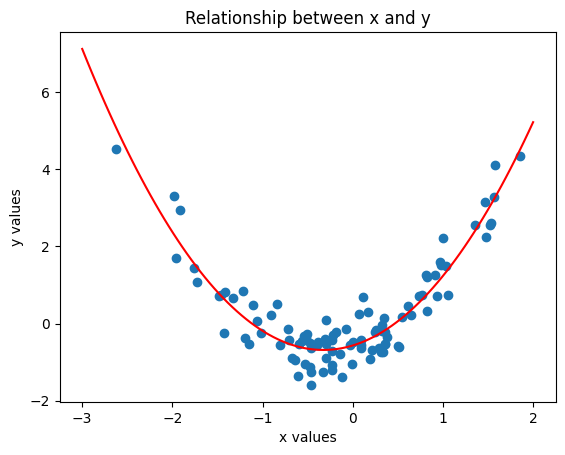

In [17]:
plt.scatter(x, y)
plt.title('Relationship between x and y')
plt.xlabel('x values')
plt.ylabel('y values')
x_line = np.linspace(-3, 2, 100)
y_line = (poly_linear_model.intercept_ + (poly_linear_model.coef_[0] * x_line) + (poly_linear_model.coef_[1] * x_line**2))
plt.plot(x_line, y_line, color='red')

In [18]:
# (c)
y_pred = poly_linear_model.intercept_ + (x * poly_linear_model.coef_[0]) + (x**2 * poly_linear_model.coef_[1])
r2 = metrics.r2_score(y, y_pred)
print(f'r2 score: {r2}')

r2 score: 0.8784561474099984


## 3 LASSO Regression Model Analysis

In [19]:
# Reset y to linear function
y = -0.5 + (0.75 * x) + eps

# Create LASSO model
l1_model = linear_model.Lasso(alpha=0.5)
l1_model.fit(x[:, None], y)
print('LASSO Regression model coefficients')
print(f'b_0: {l1_model.intercept_}, b_1: {l1_model.coef_[0]}')

LASSO Regression model coefficients
b_0: -0.5598768350004352, b_1: 0.06601819389046765


In [20]:
# Use quadratic function
y = -0.5 + (0.75 * x) + x**2 + eps

# Create LASSO model
l1_model = linear_model.Lasso(alpha=0.5)
l1_model.fit(x[:, None], y)
print('LASSO Regression model coefficients')
print(f'b_0: {l1_model.intercept_}, b_1: {l1_model.coef_[0]}')

LASSO Regression model coefficients
b_0: 0.26057369934813174, b_1: 0.0


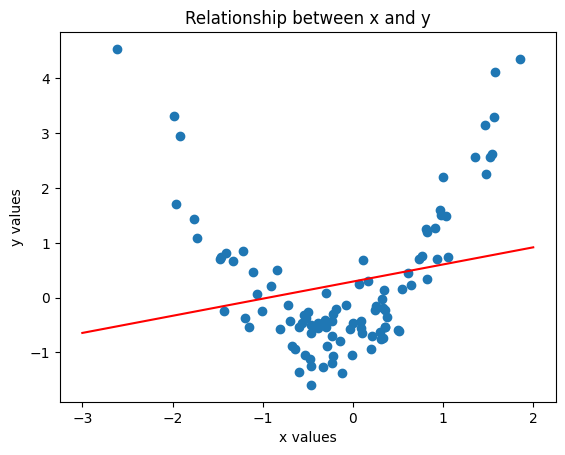

In [21]:
# Plot scatter plot with regression line:
plt.scatter(x, y)
plt.title('Relationship between x and y')
plt.xlabel('x values')
plt.ylabel('y values')
x_line = np.linspace(-3, 2, 100)
y_line = (model.intercept_ + model.coef_[0] * x_line)
plt.plot(x_line, y_line, color='red')